# TP OpenMP - October 2022

Florian Rascoussier

Bastien Barbe

Ce notebook constitue une étude comparative des méthodes de parallélisation Open MP sur CPU pour différentes applications.

## Part 1 : Pi

Ce programme calcule la valeur de pi à la précision renseignée par l'utilisateur. 

### Compilation

In [25]:
# script params
EXEC: bool = True

In [21]:
# create /bin if it does not exist
!mkdir -p bin

print("Compilation process:")
print("    + critical")
!g++ -o bin/tp_openmp_part_1_pi_critical tp_openmp_part_1_pi_critical.cpp -fopenmp -O3 -march=native

print("    + atomic")
!g++ -o bin/tp_openmp_part_1_pi_atomic tp_openmp_part_1_pi_atomic.cpp -fopenmp -O3 -march=native

print("    + reduction")
!g++ -o bin/tp_openmp_part_1_pi_reduction tp_openmp_part_1_pi_reduction.cpp -fopenmp -O3 -march=native

print("    + nred")
!g++ -o bin/tp_openmp_part_1_pi_nred tp_openmp_part_1_pi_nred.cpp -fopenmp -O3 -march=native -Wall

Compilation process:
    + critical
    + atomic
    + reduction
    + nred


### Performance evaluation

In [2]:
# global vars
csv_result_file = "stats.csv"
csv_headers = { 
    'version': str,
    'nb_threads': int,
    'num_steps' : int,
    'runtime' : float
}
color_num_steps = {
    100000 : "blue", 
    1000000 : "red", 
    10000000 : "orange",
    100000000 : "green",
    1000000000 : "black"
}
#num_steps = list(color_num_steps.keys())[0:2]
num_steps = list(color_num_steps.keys())
print(num_steps)
nb_threads = [1, 2, 4, 8]
repeats = range(0,10)

[100000, 1000000, 10000000, 100000000, 1000000000]


In [26]:
import os
import subprocess

def delete_old_csv_file():
    try:
        os.remove(csv_result_file)
    except OSError:
        pass

def create_csv_file():
    print(f"Creating NEW CSV file ({csv_result_file})")
    f = open(csv_result_file, "w")
    f.write(",".join(csv_headers.keys()) + "\n")
    f.close()

# exec
def exec_instances():
    for nsteps in num_steps:
        for nb_thread in nb_threads:
            for repeat in repeats:
                args = ("./bin/tp_openmp_part_1_pi_critical", "-T", str(nb_thread), "-N", str(nsteps))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()
                
                args = ("./bin/tp_openmp_part_1_pi_atomic", "-T", str(nb_thread), "-N", str(nsteps))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()

                args = ("./bin/tp_openmp_part_1_pi_reduction", "-T", str(nb_thread), "-N", str(nsteps))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()

                args = ("./bin/tp_openmp_part_1_pi_nred", "-T", str(nb_thread), "-N", str(nsteps))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()


if EXEC:
    delete_old_csv_file()
    create_csv_file()
    exec_instances()
else: 
    print(f"EXEC = {EXEC}. No C++ program execution.")

Creating NEW CSV file (stats.csv)


### Performance analysis

,version,nb_threads,num_steps,runtime
0,critical,1,100000,0.001093
1,atomic,1,100000,0.000429
2,reduction,1,100000,0.000120
3,nred,1,100000,0.031995
4,critical,1,100000,0.000960
5,atomic,1,100000,0.000422
6,reduction,1,100000,0.000123
7,nred,1,100000,0.031767
8,critical,1,100000,0.001837
9,atomic,1,100000,0.000430


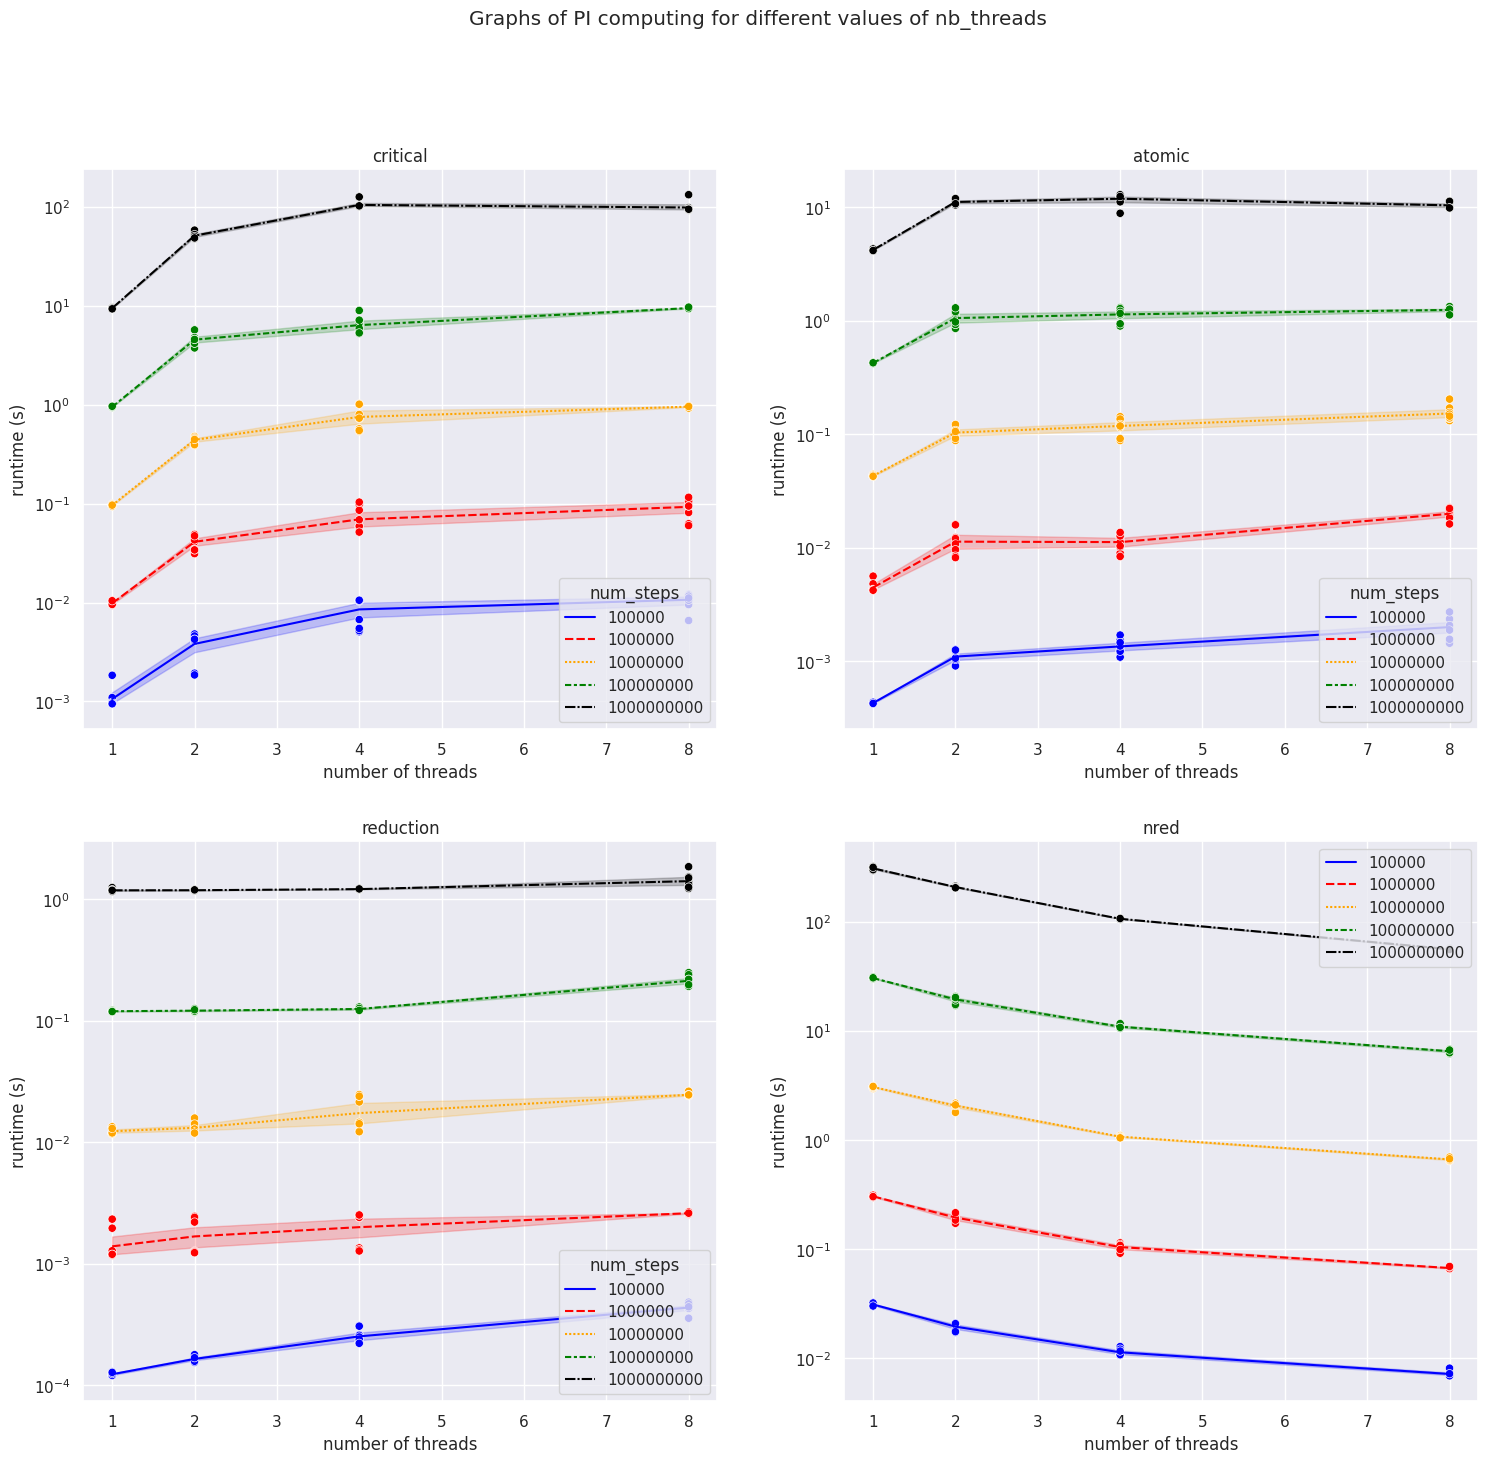

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from numpy import genfromtxt
import itertools
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()


df = pd.read_csv(
    csv_result_file,
    header=0, # line number of header
    dtype=csv_headers
)
display(df.head(10))

# display graphs
fig, ax = plt.subplots(2, 2, figsize=(18,16))
fig.suptitle("Graphs of PI computing for different values of nb_threads")

unique_nb_steps = df['num_steps'].unique()
unique_nb_steps.sort()
nb_different_num_steps = len(unique_nb_steps)

graph_version = "critical"
df_plot_0 = df[df['version'] == graph_version]

g0 = sns.lineplot(
    ax=ax[0][0],
    data=df_plot_0, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
    style="num_steps",
)
g0.set(title=graph_version)
g0.set(yscale="log")
g0.set(xlabel="number of threads", ylabel="runtime (s)")
g00 = sns.scatterplot(
    ax=ax[0][0],
    data=df_plot_0, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
    legend=False,
)
g00.set(yscale="log")

# second graph: atomic
graph_version = "atomic"
df_plot_1 = df[df['version'] == graph_version]

g1 = sns.lineplot(
    ax=ax[0][1],
    data=df_plot_1, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
    style="num_steps",
)
g1.set(title=graph_version)
g1.set(yscale="log")
g1.set(xlabel="number of threads", ylabel="runtime (s)")
g11 = sns.scatterplot(
    ax=ax[0][1],
    data=df_plot_1, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
    legend=False,
)
g11.set(yscale="log")

# third graph: reduction
graph_version = "reduction"
df_plot_2 = df[df['version'] == graph_version]

g2 = sns.lineplot(
    ax=ax[1][0],
    data=df_plot_2, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
    style="num_steps",
)
g2.set(title=graph_version)
g2.set(yscale="log")
g2.set(xlabel="number of threads", ylabel="runtime (s)")
g22 = sns.scatterplot(
    ax=ax[1][0],
    data=df_plot_2, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
    legend=False,
)
g22.set(yscale="log")

# last graph: nred
graph_version = "nred"
df_plot_3 = df[df['version'] == graph_version]

g3 = sns.lineplot(
    ax=ax[1][1],
    data=df_plot_3, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
    style="num_steps",
)
g3.set(title=graph_version)
g3.set(yscale="log")
g3.set(xlabel="number of threads", ylabel="runtime (s)")
g33 = sns.scatterplot(
    ax=ax[1][1],
    data=df_plot_3, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
    legend=False,
)
g33.set(yscale="log")


plt.legend()
plt.show()

#### Observations

Dans toutes les situations excepté *nred*, on observe qu'en augmentant le nombre de cœurs, on dégrade les performances observées. C'est un peu contre-intuitif, particulièrement pour des codes optimisés tels que les réductions qui devraient normalement moins souffrir des situations de *race conditions*. C'est portant bien ce que l'on observe, et il est difficile de dire avec certitude les raisons derrière ce phénomène. Les effets de situations de compétitions et le niveau de parallélisme, ainsi que les optimisations du compilateur (ici `g++`) sont probablement responsables de ces performances dégradées.

On remarque tout de même que *reduction* se comporte mieux que les autres programmes, ce qui était attendu puisqu'il est censé être moins sensible aux situations de *race conditions*.

Seul le graphe de *nred* présente une situation intéressante du point de vue de l'évolution des performances face à l'augmentation du nombre de cœurs, puisque le temps de calcul diminue avec celle-ci. Cependant, au regard de l'échelle, il est cependant assez mauvais comparé à *reduction* ou *atomic*.

Il serait utile de *benchmarquer* les différentes versions de notre programme en utilisant différents paramètres d'optimisation du compilateur utilisé.

#### Strong vs Weak Scaling

##### Recall:
>"Strong scaling: given a fixed size computing problem the strong scaling represents its time to solution as a function of (increasing) number of execution processors. Weak scaling: weak scaling is the time to solution of a fixed size per processor problem varying the number of processors." 
</br>(J. Rouzaud-Cornabas, HPC: Architure p14/189)

Dans notre cas, nous ne testons jamais le code en mode *weak scaling*, seulement en *strong scaling* puisque nous influons seulement sur la taille globale du problème face à l'augmentation du nombre de cœurs.



,version,nb_threads,num_steps,runtime
0,critical,1,100000,0.001093
1,atomic,1,100000,0.000429
2,reduction,1,100000,0.000120
3,nred,1,100000,0.031995
4,critical,1,100000,0.000960
5,atomic,1,100000,0.000422
6,reduction,1,100000,0.000123
7,nred,1,100000,0.031767
8,critical,1,100000,0.001837
9,atomic,1,100000,0.000430


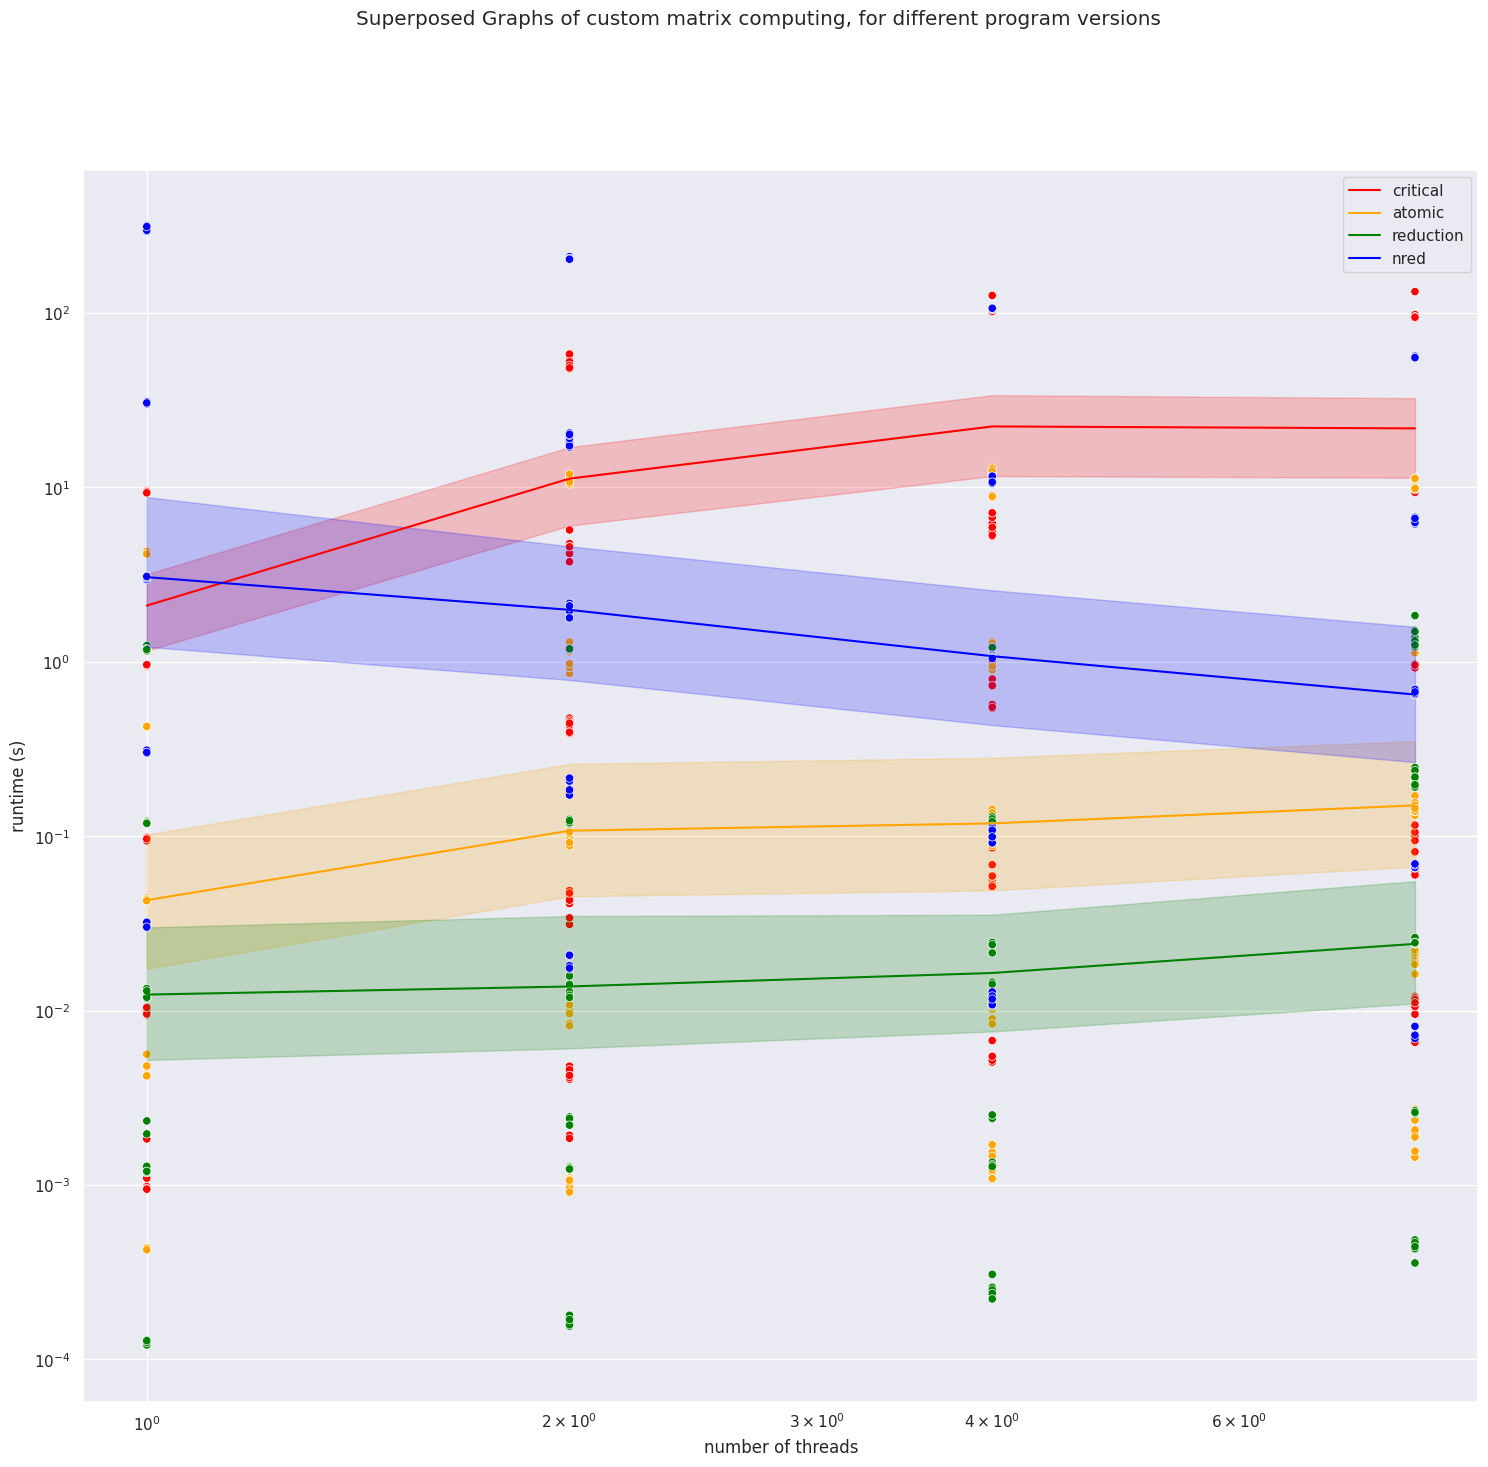

In [4]:
# superposed big graph
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from numpy import genfromtxt
import itertools
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()


df = pd.read_csv(
    csv_result_file,
    header=0, # line number of header
    dtype=csv_headers
)
display(df.head(10))

# create palette for each version
color_versions = {
    "critical": "red",
    "atomic": "orange",
    "reduction": "green",
    "nred": "blue",
}



# display graphs
fig, ax = plt.subplots(figsize=(18,16))
fig.suptitle("Superposed Graphs of custom matrix computing, for different parallism techniques")

for i in range(0, len(color_versions.keys())):
    # print version graph data
    graph_version = list(color_versions.keys())[i]
    df_plot_0 = df[df['version'] == graph_version]

    g0 = sns.lineplot(
        ax=ax,
        data=df_plot_0, 
        x="nb_threads",
        y="runtime", 
        hue="version",
        palette=color_versions,
        style="version",
    )
    g0.set(xscale="log")
    g0.set(yscale="log")
    g0.set(xlabel="number of threads", ylabel="runtime (s)")
    g00 = sns.scatterplot(
        ax=ax,
        data=df_plot_0, 
        x="nb_threads",
        y="runtime", 
        hue="version",
        palette=color_versions,
        legend=False,
    )
    g00.set(xscale="log")
    g00.set(yscale="log")


plt.legend()
plt.show()

# Observations

On remarque que la courbe verte, c'est-à-dire que la version utilisant la réduction est la meilleure dans l'entièreté des cas. Cependant, on peut noter que la dispersion des temps de calculs est assez importante, il serait donc nécessaire d'investiguer cette disparité pour savoir si les différences observées entre les versions sont significatives à l'aide de tests statistiques.

Comme observé dans les graphiques précédents, nred est la seule courbe à tendance décroissante en fonction de l'augmentation du nombre de cœurs. Elle reste cependant moins performante que les solutions utilisant la réduction et critical.